In [1]:
#Importando librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Cargando datos del proyecto
data = np.load('proyecto_data/proyecto_training_data.npy')
columnas_nombre = np.array(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
columnas_descripcion = np.array(['Precio', 'Feedback', 'Metros cuadrados del primer nivel', 'Habitaciones', 'Año de construcción', 'Distancia lineal desde la calle'])

#Forma
shape = data.shape
print("Shape: ", shape)

#Previsualización general de los datos
print("Previsualización: ")
print(pd.DataFrame(data, columns=columnas_nombre).head().to_string(index=False))


Shape:  (1460, 6)
Previsualización: 
 SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
  208500.0          7.0     856.0           8.0     2003.0         65.0
  181500.0          6.0    1262.0           6.0     1976.0         80.0
  223500.0          7.0     920.0           6.0     2001.0         68.0
  140000.0          7.0     961.0           7.0     1915.0         60.0
  250000.0          8.0    1145.0           9.0     2000.0         84.0


In [3]:
#●	Usando sclicing con NumPy separar los datos en 2 datasets:

training = int(shape[0]*0.8)

#Datos de entrenamiento
data_training = data[0:training,:]
#Datos de validación y pruebas
data_validation = data[training:shape[0],:]

print("Shape training data: ", data_training.shape)
print("Shape test data: ", data_validation.shape)

Shape training data:  (1168, 6)
Shape test data:  (292, 6)


In [4]:
#Análisis exploratorio de datos

def my_reshape(my_array):
    return my_array.reshape(my_array.shape[0], 1)

#?	Para cada variable en el dataset calcular((usando numpy o pandas):

#Media
media = my_reshape(np.nanmean(data, axis=0))
print("\n")
print(pd.DataFrame(media, index=columnas_nombre, columns=["Media"]).to_string())

#Máximo
maximo = my_reshape(np.nanmax(data, axis=0))
print("\n")
print(pd.DataFrame(maximo, index=columnas_nombre, columns=["Máximo"]).to_string())

#Mínimo
minimo = my_reshape(np.nanmin(data, axis=0))
print("\n")
print(pd.DataFrame(minimo, index=columnas_nombre, columns=["Mínimo"]).to_string())

#Range peak to peak
rango_ptp = my_reshape(np.ptp(data, axis=0))
print("\n")
print(pd.DataFrame(rango_ptp, index=columnas_nombre, columns=["Rango peak to peak"]).to_string())

#En el resultado se observa que la columna 6 tiene valores null
#Dado que np.ptp no tiene np.nanptp, se procede a eliminar los valores nan de la columna 6
col_6_isnan = np.isnan(data[:,5])
#Se reemplaza el 6to valor en rango_ptp con la nueva columna
rango_ptp[5, 0] = np.ptp(data[col_6_isnan==False, 5])
print("\n")
print(pd.DataFrame(rango_ptp, index=columnas_nombre, columns=["Rango peak to peak (sin nan)"]).to_string())

#Desviación estandar
desviacion_estandar = my_reshape(np.nanstd(data, axis=0))
print("\n")
print(pd.DataFrame(desviacion_estandar, index=columnas_nombre, columns=["Desviación estandar"]).to_string())




                      Media
SalePrice     180921.195890
OverallQual        6.099315
1stFlrSF        1162.626712
TotRmsAbvGrd       6.517808
YearBuilt       1971.267808
LotFrontage       70.049958


                Máximo
SalePrice     755000.0
OverallQual       10.0
1stFlrSF        4692.0
TotRmsAbvGrd      14.0
YearBuilt       2010.0
LotFrontage      313.0


               Mínimo
SalePrice     34900.0
OverallQual       1.0
1stFlrSF        334.0
TotRmsAbvGrd      2.0
YearBuilt      1872.0
LotFrontage      21.0


              Rango peak to peak
SalePrice               720100.0
OverallQual                  9.0
1stFlrSF                  4358.0
TotRmsAbvGrd                12.0
YearBuilt                  138.0
LotFrontage                  NaN


              Rango peak to peak (sin nan)
SalePrice                         720100.0
OverallQual                            9.0
1stFlrSF                            4358.0
TotRmsAbvGrd                          12.0
YearBuilt                        

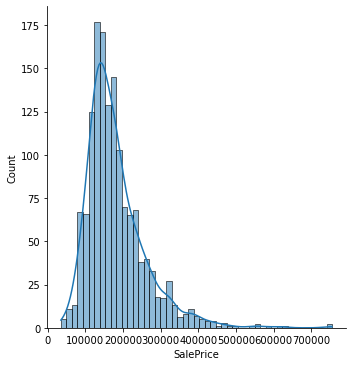

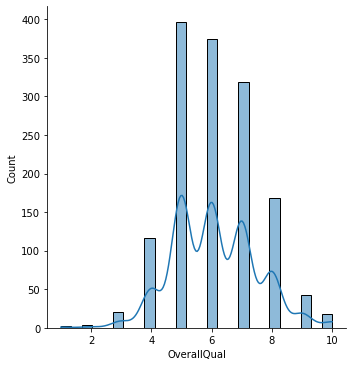

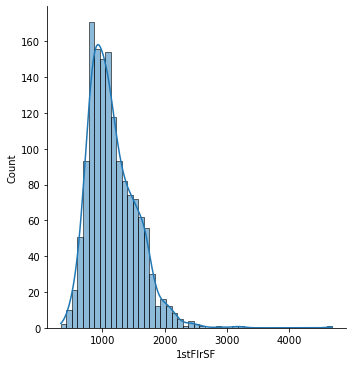

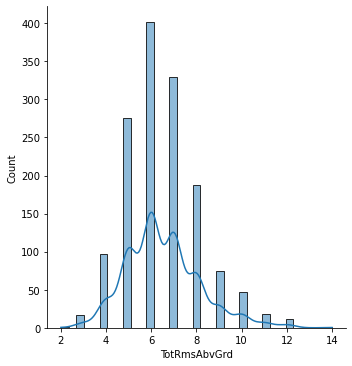

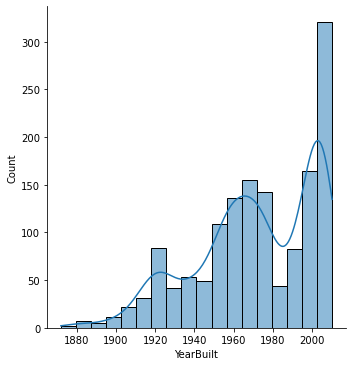

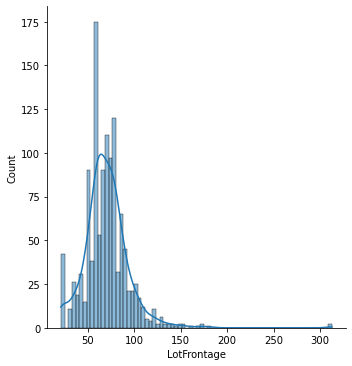

In [5]:
#○	Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html)  para graficar  un histograma de la variable

#Histograma de la variable

c0 = sns.displot(data=data[:,0], kde=True)
c0.set_axis_labels(columnas_nombre[0])

c1 = sns.displot(data=data[:,1], kde=True)
c1.set_axis_labels(columnas_nombre[1])

c2 = sns.displot(data=data[:,2], kde=True)
c2.set_axis_labels(columnas_nombre[2])

c3 = sns.displot(data=data[:,3], kde=True)
c3.set_axis_labels(columnas_nombre[3])

c4 = sns.displot(data=data[:,4], kde=True)
c4.set_axis_labels(columnas_nombre[4])

c5 = sns.displot(data=data[:,5], kde=True)
c5.set_axis_labels(columnas_nombre[5])



In [6]:
#○	Calcular el coeficiente de correlación entre x y y

#Covarianza
cov = np.cov(data, rowvar=False)[0,0:]

#Covarianza para la columna 6
x = data[col_6_isnan==False, 5]
ynan = data[col_6_isnan==False, 0]
cov[-1] = np.cov(x, ynan)[0,1]
cov = cov.reshape(1, 6)

print("Covarianza")
print(cov)

#Coheficiente de correlación
cc = cov / (desviacion_estandar[0,0]*desviacion_estandar[0])
#[0,1:]
print("\nCoheficiente de correlación:\n")
print(pd.DataFrame(cc, columns=columnas_nombre).iloc[:,1:6].to_string(index=False))

Covarianza
[[6.31111126e+09 8.69041258e+04 1.86066279e+07 6.89171685e+04
  1.25463688e+06 7.12426166e+05]]

Coheficiente de correlación:

 OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
    0.000014   0.00295      0.000011   0.000199     0.000113


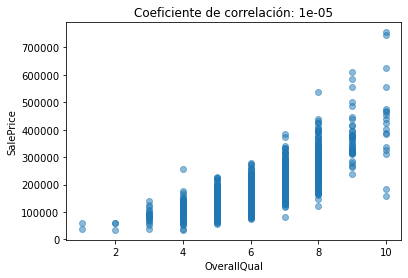

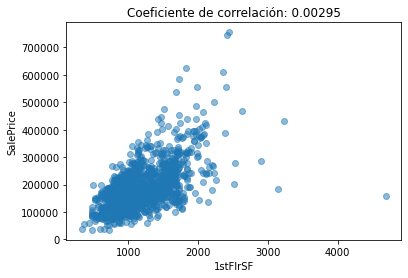

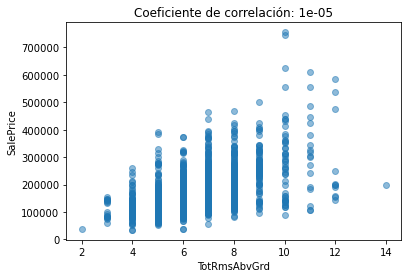

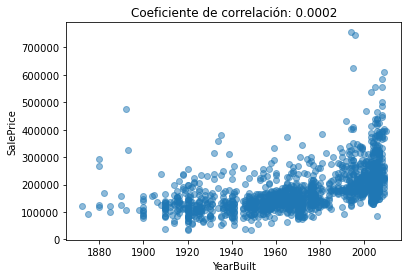

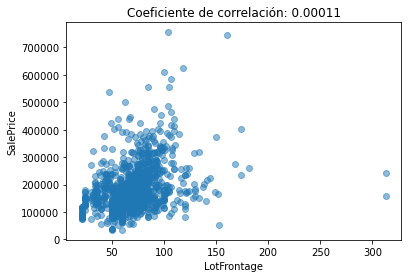

Variables x que representan un mayor valor predictivo
OverallQual  Coeficiente de correlación = 1.3779457589347163e-05
1stFlrSF  Coeficiente de correlación = 0.0029502539366885335


In [7]:
#○	graficar x vs y(scatterplot) usando matplotlib
#○	Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica. 


# Grafica x vs y (scatterplot) usando matplotlib
for i in range(1,6):
    plt.scatter(data[:,i], data[:,0], alpha=0.5)
    plt.xlabel(columnas_nombre[i])
    plt.ylabel(columnas_nombre[0])
    plt.title("Coeficiente de correlación: "+str(np.around(cc[0,i], 5)))
    plt.show()

#●	Basado en la gráfica y el coeficiente de correlación  de cada par x,y elegir  las 2 variables con más potencial predictivo(la 2 que presentan mayor correlación).
    
# Variables x que representan un mayor predictivo
print("Variables x que representan un mayor valor predictivo")
print(columnas_nombre[1], " Coeficiente de correlación =", cc[0,1])
print(columnas_nombre[2], " Coeficiente de correlación =", cc[0,2])

columna_1st_predictivo = 1
columna_2nd_predictivo = 2

In [8]:
#●	Crear una función para entrenar un modelo de regresión lineal de una variable y = mx +b.
def regresion_lineal(x, y, epochs, imprimir_error_cada, lr):
    
    #○	Crear una matriz de 2 columnas ,la primera columna corresponde al vector de datos “x” y la segunda columna de la matriz para todas las filas es igual a 1
    matriz_auxiliar = np.hstack((x, np.ones(x.shape) ))
    
    #○	Inicializar los parámetros del modelo en un vector (m,b), esto es equivalente a empezar el proceso con una recta inicial la cual en cada iteración actualizaremos hasta encontrar una que aproxime de buena manera los datos x,y
    mb = np.array([[0], [0]])
    
    #Vector de errores
    errores = np.array([])
    
    #Estructura de datos
    estructura_datos = {}
    
    #Iteraciones, de 1 a epochs
    for iteracion in range(1, epochs+1):
        
        #■	Calcular yhat(predicción o estimación) para todas las observaciones de manera simultánea(vectorizada)  utilizando el modelo correspondiente a la iteración(es decir , los valores de m,b): esto produce un vector yhat con el mismo número de elementos que y.
        yhat = np.dot(matriz_auxiliar, mb)

        #media = my_reshape(np.nanmean(data, axis=0))

        #■	Calcular el error o costo usando: y, y_hat
        error = np.nanmean((y - yhat)**2)/2
        if iteracion%imprimir_error_cada == 0:
            print("error (", iteracion,"):", error)

        #■	Almacenar en un vector el error de cada iteración. 
        errores = np.append(errores, error)

        #■	Calcular el gradiente del error respecto de cada parámetro con las expresiones
        gradiente = np.nanmean((yhat - y)*matriz_auxiliar, axis=0).reshape(2,1)

        #■	Actualizar los parámetros del modelo con la expresión
        mb = mb-lr*gradiente
        
        estructura_datos[iteracion] = {'yhat': yhat, 'gradiente': gradiente, 'mb': mb}
        
        #No continua evaluando si el error es infinito
        if np.isinf(error):
            break
    
    return (errores, estructura_datos)
        
print("\nRegresión lineal con el primer valor más predictivo")
x = my_reshape(data[:,0])
y = my_reshape(data[:,columna_1st_predictivo])
epochs = 200
imprimir_error_cada = 10
lr = 0.00000000001
resultados_1st_predictivo = regresion_lineal(x, y, epochs, imprimir_error_cada, lr)

print("\nRegresión lineal con el segundo valor más predictivo")
x = my_reshape(data[:,0])
y = my_reshape(data[:,columna_2nd_predictivo])
epochs = 200
imprimir_error_cada = 10
lr = 0.0000000001
resultados_2nd_predictivo = regresion_lineal(x, y, epochs, imprimir_error_cada, lr)




Regresión lineal con el primer valor más predictivo
error ( 10 ): 1.4117283410936599
error ( 20 ): 1.409275373975414
error ( 30 ): 1.4092752507174606
error ( 40 ): 1.409275250677296
error ( 50 ): 1.4092752506433213
error ( 60 ): 1.4092752506093469
error ( 70 ): 1.4092752505753723
error ( 80 ): 1.409275250541398
error ( 90 ): 1.4092752505074233
error ( 100 ): 1.4092752504734487
error ( 110 ): 1.4092752504394748
error ( 120 ): 1.4092752504055
error ( 130 ): 1.4092752503715256
error ( 140 ): 1.409275250337551
error ( 150 ): 1.4092752503035766
error ( 160 ): 1.4092752502696024
error ( 170 ): 1.4092752502356283
error ( 180 ): 1.4092752502016537
error ( 190 ): 1.409275250167679
error ( 200 ): 1.409275250133705

Regresión lineal con el segundo valor más predictivo
error ( 10 ): 144758760547675.4
error ( 20 ): 2.6324374736209723e+23
error ( 30 ): 4.787086481052943e+32
error ( 40 ): 8.705314829589374e+41
error ( 50 ): 1.5830611496619498e+51
error ( 60 ): 2.8787960603685985e+60
error ( 70 ): 5.